# Topic Modelling 

In [179]:
#Importing Libraries

import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/Users/JohanNg/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [369]:
df = pd.read_csv('mh_cleaned.csv')

In [370]:
df['subreddit'].value_counts(normalize = True)

depression       0.536533
anxiety          0.210406
suicidewatch     0.195485
schizophrenia    0.024733
bipolarreddit    0.017080
alcoholism       0.015763
Name: subreddit, dtype: float64

In [372]:
df['subreddit'].value_counts()

depression       96122
anxiety          37695
suicidewatch     35022
schizophrenia     4431
bipolarreddit     3060
alcoholism        2824
Name: subreddit, dtype: int64

In [375]:
df.shape

(179154, 5)

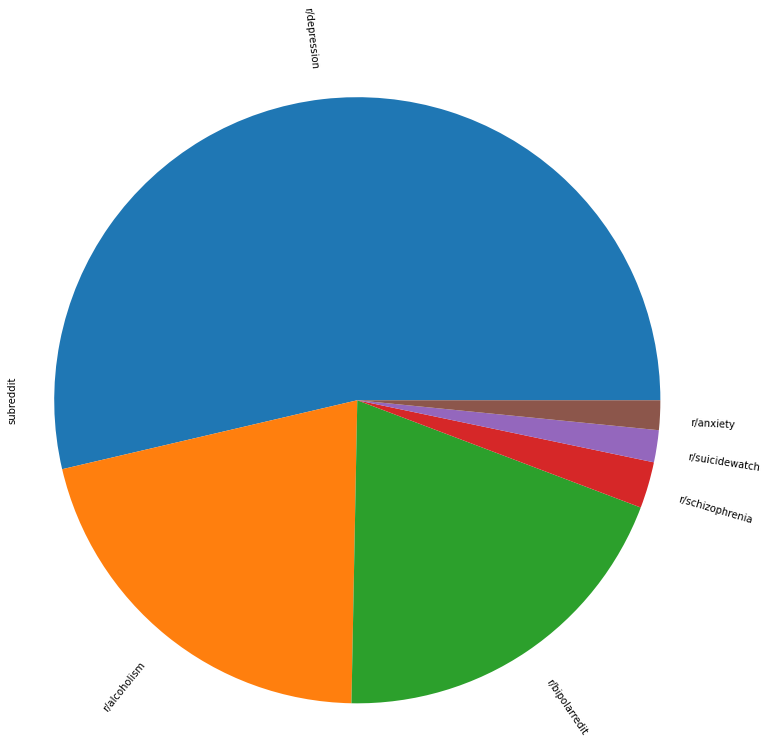

In [377]:
#Plotting Bar Chart 

plt.figure(figsize = (12,12))
labels = 'r/depression','r/alcoholism','r/bipolarredit','r/schizophrenia','r/suicidewatch','r/anxiety'
sizes = [53.7,1.6,1.7,2.5,19.5,21.0]
df['subreddit'].value_counts().plot.pie(rotatelabels = True, labels = labels)
plt.axis('equal')
plt.show()

## Text Preprocessing

In [4]:
#Defining function for Text-Preprocessing

def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos = 'v')

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
    

In [6]:
#Sample Test

sample = df['post'][0]

print('Orginal document: ')
words = []

for word in sample.split(' '):
    words.append(word)
print(words)

print('\nTokenized and Lemmatized document')
print(preprocess(sample))

Orginal document: 
['school', 'makes', 'me', 'suicidal', '(please', 'help)', 'im', 'a', '16', 'year', 'old', 'girl', 'from', 'england.', '\nive', 'attempted', 'suicide', '6', 'times', 'in', 'the', 'space', 'of', '(almost)', '2', 'years', 'because', 'of', 'school.\nmy', 'head', 'of', 'year', 'is', 'supposed', 'to', 'help', 'students', 'with', 'anxiety', 'and', 'let', 'us', 'sit', 'outside', 'her', 'office', 'but', 'she', 'just', 'tells', 'me', 'to', 'go', 'away.', 'i', 'told', 'her', 'i', 'was', 'going', 'to', 'kill', 'myself', 'and', 'she', 'just', 'told', 'me', 'to', 'stop', 'being', 'dramatic.', '\n\nim', 'feeling', 'really', 'suicidal', 'right', 'now,', 'and', 'i', 'want', 'to', 'tell', 'my', 'mum', 'because', 'im', 'scared', 'im', 'going', 'to', 'hurt', 'myself,', 'but', 'she’ll', 'just', 'think', 'im', 'attention', 'seeking.', '\ni', 'really', 'dont', 'know', 'what', 'to', 'do.', 'i', 'start', 'school', 'in', 'the', 'morning', 'at', '7.30am', 'and', 'its', '11:54pm', 'right', 'now

In [11]:
#Getting tokenized and lematized documents 
mh_docs = df['post'].map(preprocess)
mh_docs[:10]

0    [school, make, suicidal, help, year, girl, eng...
1    [fail, want, wipe, hand, clean, bare, minimum,...
2    [depress, holiday, call, message, email, holid...
3    [hard, want, school, week, hard, school, hard,...
4    [year, pixels, go, year, pixels, things, track...
5    [depression, reddit, post, speak, english, exp...
6    [depression, exist, swear, mental, illness, la...
7    [happen, kill, world, funny, people, swear, ne...
8    [correlation, money, mental, health, need, kno...
9    [worst, fix, depression, figure, start, look, ...
Name: post, dtype: object

In [12]:
#Create Dictionary
def dictionary_bow(docs):
    
    dictionary = gensim.corpora.Dictionary(docs)

    count = 0
    for k,v in dictionary.iteritems():
        print(k,v)
        count +=1
        if count > 10:
            break
            
    return dictionary

In [13]:
#Create Dictionary
mh_dict = dictionary_bow(mh_docs)

#Corpus
text = mh_docs

0 anxiety
1 attempt
2 attention
3 away
4 dont
5 dramatic
6 england
7 feel
8 girl
9 go
10 head


In [14]:
#Gensim doc2bow => Convert to Bag of Words Format

def doc2bow(df_docs):
    
    doc2bow = [mh_dict.doc2bow(doc) for doc in df_docs]
    
    return doc2bow

In [15]:
#Term Document Frequency
mh_corpus = doc2bow(mh_docs)

In [16]:
#Sampling

mh_corpus_0 = mh_corpus[0]

for i in range(len(mh_corpus_0)):
    print(f"Word {mh_corpus_0[i][0]} ('{mh_dict[mh_corpus_0[i][0]]}') appears {mh_corpus_0[i][1]} time.")

Word 0 ('anxiety') appears 1 time.
Word 1 ('attempt') appears 1 time.
Word 2 ('attention') appears 1 time.
Word 3 ('away') appears 1 time.
Word 4 ('dont') appears 1 time.
Word 5 ('dramatic') appears 1 time.
Word 6 ('england') appears 1 time.
Word 7 ('feel') appears 1 time.
Word 8 ('girl') appears 1 time.
Word 9 ('go') appears 2 time.
Word 10 ('head') appears 1 time.
Word 11 ('help') appears 2 time.
Word 12 ('hurt') appears 1 time.
Word 13 ('kill') appears 1 time.
Word 14 ('know') appears 1 time.
Word 15 ('make') appears 1 time.
Word 16 ('morning') appears 1 time.
Word 17 ('office') appears 1 time.
Word 18 ('outside') appears 1 time.
Word 19 ('right') appears 2 time.
Word 20 ('scar') appears 1 time.
Word 21 ('school') appears 3 time.
Word 22 ('seek') appears 1 time.
Word 23 ('space') appears 1 time.
Word 24 ('start') appears 1 time.
Word 25 ('stop') appears 1 time.
Word 26 ('students') appears 1 time.
Word 27 ('suicidal') appears 2 time.
Word 28 ('suicide') appears 1 time.
Word 29 ('sup

## Topic Modelling using LDA

In [17]:
from gensim import corpora, models
#Running LDA Using BOW
t = time()

lda_model = gensim.models.LdaMulticore(corpus = mh_corpus, 
                                       num_topics = 10,
                                       id2word = mh_dict,
                                       passes = 10,
                                       chunksize = 100,
                                       random_state = 100,
                                       iterations = 10,
                                       workers = 8)

print('Time to build LDA Model: {} mins'.format(round((time() - t) / 60, 2)))

Time to build LDA Model: 16.43 mins


In [18]:
for idx, topic in lda_model.print_topics():
    print('\nTopic: {} \nWords: {}'.format(idx,topic))


Topic: 0 
Words: 0.076*"sleep" + 0.046*"drink" + 0.045*"wake" + 0.037*"night" + 0.019*"work" + 0.018*"hours" + 0.017*"morning" + 0.016*"days" + 0.015*"time" + 0.014*"eat"

Topic: 1 
Words: 0.018*"like" + 0.018*"feel" + 0.017*"think" + 0.014*"head" + 0.012*"heart" + 0.012*"pain" + 0.011*"mind" + 0.011*"happen" + 0.011*"body" + 0.011*"thoughts"

Topic: 2 
Words: 0.028*"go" + 0.017*"leave" + 0.017*"time" + 0.015*"say" + 0.015*"tell" + 0.015*"home" + 0.012*"house" + 0.012*"come" + 0.011*"start" + 0.010*"today"

Topic: 3 
Words: 0.058*"anxiety" + 0.014*"take" + 0.012*"experience" + 0.012*"attack" + 0.012*"start" + 0.011*"panic" + 0.011*"doctor" + 0.011*"work" + 0.010*"go" + 0.010*"help"

Topic: 4 
Words: 0.065*"life" + 0.024*"live" + 0.024*"love" + 0.023*"years" + 0.022*"time" + 0.015*"things" + 0.011*"friends" + 0.010*"lose" + 0.010*"happy" + 0.010*"good"

Topic: 5 
Words: 0.057*"people" + 0.026*"like" + 0.020*"think" + 0.013*"look" + 0.013*"talk" + 0.011*"person" + 0.011*"know" + 0.010*"

In [19]:
from gensim.models import CoherenceModel

#Compute Coherence Score
coherence_model_lda = CoherenceModel(model = lda_model,texts = text, dictionary = mh_dict, coherence = 'c_v')

print('\nCoherence Score: {}'.format(coherence_model_lda.get_coherence()))


Coherence Score: 0.3775861181067225


## Choosing Optimal Number of Topics

In [24]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus = corpus, 
                                       num_topics = num_topics,
                                       id2word = mh_dict,
                                       passes = 10,
                                       chunksize = 100,
                                       random_state = 100,
                                       iterations = 10,
                                       workers = 8)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary= dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [25]:
model_list, coherence_values = compute_coherence_values(dictionary=mh_dict, corpus=mh_corpus, texts=text, start=5, limit=40, step=5)

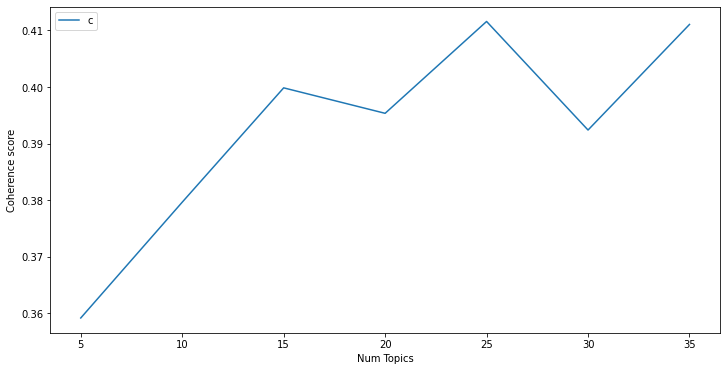

In [382]:
limit=40; start=5; step=5;
x = range(start, limit, step)
plt.figure(figsize = (12,6))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [29]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.3592
Num Topics = 10  has Coherence Value of 0.3797
Num Topics = 15  has Coherence Value of 0.3999
Num Topics = 20  has Coherence Value of 0.3954
Num Topics = 25  has Coherence Value of 0.4116
Num Topics = 30  has Coherence Value of 0.3924
Num Topics = 35  has Coherence Value of 0.4111


## Hyperparameter Tuning for Alpha and Eta Values

In [39]:
# supporting function
def compute_alpha_eta(corpus, dictionary, a,b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=15, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           workers = 8)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=mh_dict, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [43]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(mh_corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(dep_corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(dep_corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(mh_corpus, int(num_of_docs*0.75)), 
               mh_corpus]
corpus_sets = [mh_corpus]
corpus_title = ['75% Corpus', '100% Corpus']
# corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=1)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through alpha values
        for a in alpha:
            # iterate through beta values
            for b in beta:
                # get the coherence score for the given parameters
                cv = compute_alpha_eta(corpus=corpus_sets[i], dictionary=mh_dict, a = a, b=b)
                # Save the model results
                model_results['Validation_Set'].append(corpus_title[i])
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                    
                pbar.update(1)
                    
#     pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()
    
    





  0%|          | 0/1 [18:16<?, ?it/s]




100%|██████████| 1/1 [14:19<00:00, 859.16s/it]



2it [29:22, 872.32s/it]                       



3it [44:29, 882.82s/it]



4it [1:01:24, 922.38s/it]



5it [1:17:44, 939.75s/it]



6it [1:33:14, 936.86s/it]



7it [1:49:48, 954.00s/it]



8it [2:09:03, 1014.24s/it]



9it [2:26:14, 1019.22s/it]



10it [2:45:09, 1054.01s/it]



11it [3:01:43, 1036.00s/it]



12it [3:20:02, 1055.03s/it]



13it [3:38:10, 1064.74s/it]



14it [3:56:12, 1069.88s/it]



15it [4:15:13, 1091.20s/it]



16it [4:32:33, 1076.00s/it]



17it [4:50:08, 1069.62s/it]



18it [5:07:23, 1059.40s/it]



19it [5:24:37, 1051.58s/it]



20it [5:40:44, 1026.23s/it]



21it [5:55:32, 984.92s/it] 



22it [6:10:46, 963.42s/it]



23it [6:25:27, 938.83s/it]



24it [6:39:58, 918.50s/it]



25it [6:55:15, 918.11s/it]



26it [7:10:40, 920.08s/it]



27it [7:59:06, 1515.76s/it]



28it [8:14:29, 1338.06s/it]



29it [8:30:12, 1219.56s/it]



30it [8:46:57, 1053.91s/it]


In [44]:
model_results = pd.DataFrame(model_results)


In [45]:
model_results['Coherence'].sort_values()

14    0.386246
5     0.386352
9     0.387251
10    0.389919
0     0.390051
16    0.390431
11    0.390632
12    0.392511
29    0.392662
20    0.393488
25    0.393549
19    0.393568
15    0.394111
18    0.397703
17    0.398590
4     0.400162
24    0.402126
6     0.409538
21    0.410661
28    0.417808
3     0.420054
23    0.425884
1     0.425919
13    0.426145
7     0.430146
2     0.433044
26    0.436891
22    0.457897
8     0.458550
27    0.478275
Name: Coherence, dtype: float64

In [71]:
model_results.loc[7]

Validation_Set    75% Corpus
Alpha                   0.31
Beta                    0.61
Coherence           0.430146
Name: 7, dtype: object

In [48]:
model_results.head()

,Validation_Set,Alpha,Beta,Coherence
0,75% Corpus,0.01,0.01,0.390051
1,75% Corpus,0.01,0.31,0.425919
2,75% Corpus,0.01,0.61,0.433044
3,75% Corpus,0.01,0.91,0.420054
4,75% Corpus,0.01,symmetric,0.400162


In [78]:
model_results.to_csv('lda_results_mh.csv',index = False)


## Final Model

In [75]:
#Running LDA Using BOW
t = time()

lda_model_final = gensim.models.LdaMulticore(corpus = mh_corpus, 
                                       num_topics = 15,
                                       id2word = mh_dict,
                                       passes = 10,
                                       chunksize = 100,
                                       random_state = 100,
                                       iterations = 10,
                                       alpha = 0.01,
                                       eta = 0.61,
                                       workers = 8)

print('Time to build LDA Model: {} mins'.format(round((time() - t) / 60, 2)))

#Alpha: 0.01, eta = 0.61, 0.47
#Alpha: asymetric, eta = 0.61, 0.43
#Alpha: 0.31, eta, 0.91, 0.45
#Alpha: symmetric, eta, 0.61, 0.44
#Alpha: asymetric, eta = 0.31, 0.40
#Alpha: 0.31, eta, 0.61, 0.42


Time to build LDA Model: 14.26 mins


In [76]:
for idx, topic in lda_model_final.print_topics():
    print('\nTopic: {} \nWords: {}'.format(idx,topic))
    


Topic: 0 
Words: 0.046*"life" + 0.043*"want" + 0.025*"live" + 0.019*"know" + 0.019*"think" + 0.018*"kill" + 0.014*"anymore" + 0.014*"love" + 0.014*"go" + 0.013*"suicide"

Topic: 1 
Words: 0.101*"anxiety" + 0.043*"attack" + 0.042*"panic" + 0.022*"anxious" + 0.016*"heart" + 0.013*"have" + 0.013*"breathe" + 0.012*"fear" + 0.012*"worry" + 0.011*"happen"

Topic: 2 
Words: 0.021*"go" + 0.013*"time" + 0.012*"today" + 0.011*"come" + 0.010*"walk" + 0.010*"room" + 0.010*"start" + 0.010*"home" + 0.009*"look" + 0.008*"think"

Topic: 3 
Words: 0.022*"anxiety" + 0.020*"take" + 0.015*"medication" + 0.015*"doctor" + 0.014*"meds" + 0.014*"depression" + 0.013*"start" + 0.012*"disorder" + 0.012*"years" + 0.011*"experience"

Topic: 4 
Words: 0.033*"people" + 0.010*"like" + 0.009*"think" + 0.008*"look" + 0.008*"things" + 0.007*"experience" + 0.007*"self" + 0.006*"social" + 0.006*"person" + 0.006*"mind"

Topic: 5 
Words: 0.131*"fuck" + 0.052*"dont" + 0.047*"shit" + 0.040*"hate" + 0.027*"want" + 0.018*"like

In [77]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model = lda_model_final,texts = text, dictionary = mh_dict, coherence = 'c_v')

print('\nCoherence Score: {}'.format(coherence_model_lda.get_coherence()))


Coherence Score: 0.4541135640943437


In [79]:
#Save model
lda_model_final.save('lda_mh')

In [81]:
for idx, topic in lda_model_final.print_topics(num_words = 30):
    print('\nTopic: {} \nWords: {}'.format(idx,topic))


Topic: 0 
Words: 0.046*"life" + 0.043*"want" + 0.025*"live" + 0.019*"know" + 0.019*"think" + 0.018*"kill" + 0.014*"anymore" + 0.014*"love" + 0.014*"go" + 0.013*"suicide" + 0.012*"years" + 0.011*"time" + 0.010*"pain" + 0.010*"care" + 0.009*"better" + 0.009*"family" + 0.009*"try" + 0.008*"people" + 0.008*"wish" + 0.008*"point" + 0.008*"leave" + 0.007*"hurt" + 0.007*"world" + 0.007*"lose" + 0.006*"happy" + 0.006*"tire" + 0.006*"reason" + 0.006*"death" + 0.006*"hope" + 0.006*"good"

Topic: 1 
Words: 0.101*"anxiety" + 0.043*"attack" + 0.042*"panic" + 0.022*"anxious" + 0.016*"heart" + 0.013*"have" + 0.013*"breathe" + 0.012*"fear" + 0.012*"worry" + 0.011*"happen" + 0.010*"pain" + 0.009*"body" + 0.009*"chest" + 0.008*"calm" + 0.008*"scar" + 0.008*"stress" + 0.007*"cause" + 0.007*"start" + 0.007*"stomach" + 0.007*"think" + 0.006*"experience" + 0.006*"symptoms" + 0.006*"trigger" + 0.005*"shake" + 0.005*"get" + 0.005*"sick" + 0.005*"go" + 0.005*"freak" + 0.005*"breath" + 0.004*"terrify"

Topic: 

In [34]:
#Loading trained model
lda = gensim.models.LdaMulticore.load('lda_mh')

## Exploration of Topics

### Get Dominant Topics

In [85]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Initialize output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_final, corpus=mh_corpus, texts=text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.6241,"help, know, tell, need, want, think, talk, pos...","[school, make, suicidal, help, year, girl, eng..."
1,1,0.0,0.5127,"life, want, live, know, think, kill, anymore, ...","[fail, want, wipe, hand, clean, bare, minimum,..."
2,2,10.0,0.6203,"friends, talk, friend, want, know, people, lov...","[depress, holiday, call, message, email, holid..."
3,3,10.0,0.4170,"friends, talk, friend, want, know, people, lov...","[hard, want, school, week, hard, school, hard,..."
4,4,13.0,0.3861,"school, college, class, high, year, grade, stu...","[year, pixels, go, year, pixels, things, track..."
5,5,10.0,0.4883,"friends, talk, friend, want, know, people, lov...","[depression, reddit, post, speak, english, exp..."
6,6,5.0,0.3986,"fuck, dont, shit, hate, want, like, kill, peop...","[depression, exist, swear, mental, illness, la..."
7,7,9.0,0.2714,"help, know, tell, need, want, think, talk, pos...","[happen, kill, world, funny, people, swear, ne..."
8,8,0.0,0.4318,"life, want, live, know, think, kill, anymore, ...","[correlation, money, mental, health, need, kno..."
9,9,14.0,0.3897,"feel, like, know, think, time, want, things, m...","[worst, fix, depression, figure, start, look, ..."


In [88]:
df_dominant_topic.shape

(179154, 5)

In [87]:
df.shape

(179154, 5)

In [90]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.6241,"help, know, tell, need, want, think, talk, pos...","[school, make, suicidal, help, year, girl, eng..."
1,1,0.0,0.5127,"life, want, live, know, think, kill, anymore, ...","[fail, want, wipe, hand, clean, bare, minimum,..."
2,2,10.0,0.6203,"friends, talk, friend, want, know, people, lov...","[depress, holiday, call, message, email, holid..."
3,3,10.0,0.4170,"friends, talk, friend, want, know, people, lov...","[hard, want, school, week, hard, school, hard,..."
4,4,13.0,0.3861,"school, college, class, high, year, grade, stu...","[year, pixels, go, year, pixels, things, track..."
...,...,...,...,...,...
179149,179149,4.0,0.4875,"people, like, think, look, things, experience,...","[life, exactly, nearly, ready, need, write, sh..."
179150,179150,0.0,0.4042,"life, want, live, know, think, kill, anymore, ...","[learn, uncle, die, home, community, service, ..."
179151,179151,9.0,0.4659,"help, know, tell, need, want, think, talk, pos...","[get, worse, increasingly, suicidal, late, beg..."
179152,179152,0.0,0.3494,"life, want, live, know, think, kill, anymore, ...","[best, friend, want, occasionally, suicidal, p..."


In [89]:
df

,subreddit,author,date,post,clean
0,depression,hanngapoi,2018/01/01,school makes me suicidal (please help) im a 16...,school make suicidal please help year old girl...
1,depression,thr0w4w4y989897,2018/01/01,I give up. Failed I just want to wipe my hands...,give fail want wipe hand clean bare minimum re...
2,depression,mooseman1800,2018/01/01,"depressed over the holidays No calls, messages...",depress holiday call message email holiday lif...
3,depression,throwaway1802360,2018/01/01,It’s hard I don’t want to go back to school th...,hard dont want back school week hard alone sch...
4,depression,atemylife,2018/01/01,Year in Pixels I'm going to be doing one of th...,year pixels one year pixels things track much ...
...,...,...,...,...,...
179149,suicidewatch,Jupiter_Actual,2018/04/20,"What is this Life, exactly? I've got nearly ev...",life exactly ive get nearly everything ready n...
179150,suicidewatch,lukedavis77,2018/04/20,So I just learned my uncle is dying I can’t ge...,learn uncle die cant get home community servic...
179151,suicidewatch,aroeroe,2018/04/20,I just keep getting worse I have been becoming...,keep get worse become increasingly suicidal la...
179152,suicidewatch,deargodimstressedout,2018/04/20,My best friend wants to die...and as an occasi...,best friend want dieand occasionally suicidal ...


In [91]:
#Merging Original Dataframe and Dominant Topic Dataframe
df_merge = pd.merge(df, df_dominant_topic, left_index=True, right_index=True)

In [93]:
df_merge.head()

,subreddit,author,date,post,clean,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,depression,hanngapoi,2018/01/01,school makes me suicidal (please help) im a 16...,school make suicidal please help year old girl...,0,9.0,0.6241,"help, know, tell, need, want, think, talk, pos...","[school, make, suicidal, help, year, girl, eng..."
1,depression,thr0w4w4y989897,2018/01/01,I give up. Failed I just want to wipe my hands...,give fail want wipe hand clean bare minimum re...,1,0.0,0.5127,"life, want, live, know, think, kill, anymore, ...","[fail, want, wipe, hand, clean, bare, minimum,..."
2,depression,mooseman1800,2018/01/01,"depressed over the holidays No calls, messages...",depress holiday call message email holiday lif...,2,10.0,0.6203,"friends, talk, friend, want, know, people, lov...","[depress, holiday, call, message, email, holid..."
3,depression,throwaway1802360,2018/01/01,It’s hard I don’t want to go back to school th...,hard dont want back school week hard alone sch...,3,10.0,0.4170,"friends, talk, friend, want, know, people, lov...","[hard, want, school, week, hard, school, hard,..."
4,depression,atemylife,2018/01/01,Year in Pixels I'm going to be doing one of th...,year pixels one year pixels things track much ...,4,13.0,0.3861,"school, college, class, high, year, grade, stu...","[year, pixels, go, year, pixels, things, track..."


In [94]:
#Saving CSV File
df_merge.to_csv('dominant_topics.csv', index = False)

## Word Cloud

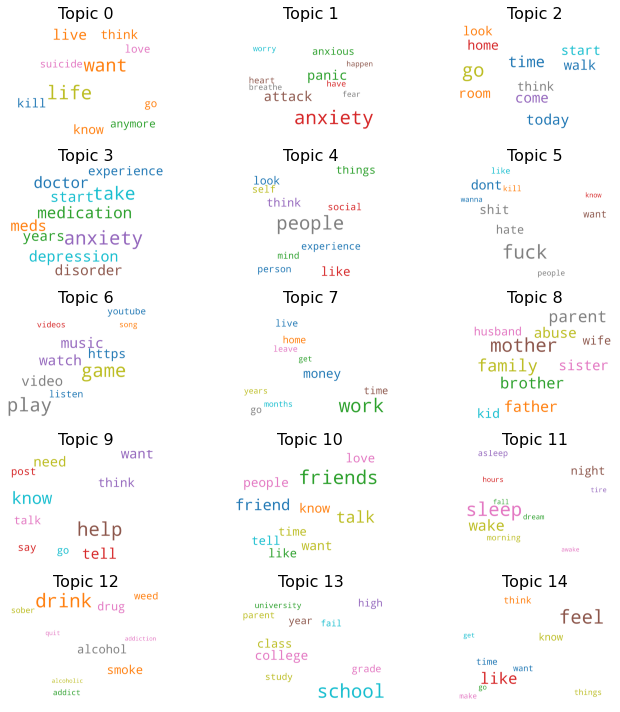

In [133]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

cloud = WordCloud(stopwords=gensim.parsing.preprocessing.STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  prefer_horizontal=1.0)

topics = lda_model_final.show_topics(num_topics = 15,formatted=False)

fig, axes = plt.subplots(5, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### pyLDAVis Visualisation

In [140]:
import pyLDAvis.gensim

In [359]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_final,mh_corpus, dictionary = lda_model_final.id2word)


In [397]:
# pyLDAvis.display(vis)

#### Topic 0 Exploration

In [172]:
def topic_cloud(topic):
    
    topics= lda_model_final.show_topic(topic, topn = 30)
    
    topic_word = dict(topics)

    cloud = WordCloud(background_color='white',
                      width=2500,
                      height=1800,
                      colormap='tab10',
                      prefer_horizontal=1.0)
    
    wordcloud = cloud.generate_from_frequencies(topic_word, max_font_size=300)
    
    plt.figure(figsize = (12,6))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.title(f'Word Cloud of Top 30 words from Topic {topic}',fontsize = 20)
    plt.axis('off')
    plt.show()

/Users/JohanNg/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


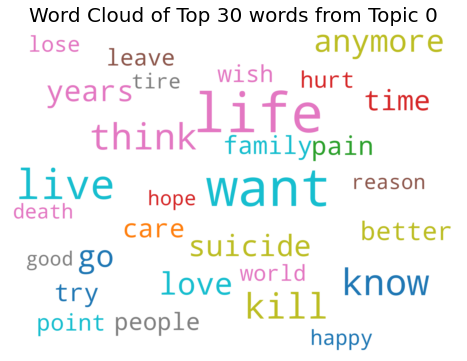

In [390]:
topic_cloud(0)

In [176]:
df_0 = df_merge[df_merge['Dominant_Topic']== 0.0]

/Users/JohanNg/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
df_0['subreddit'].value_counts(normalize = True)

depression       0.524480
suicidewatch     0.429132
anxiety          0.033173
alcoholism       0.006120
schizophrenia    0.004062
bipolarreddit    0.003033
Name: subreddit, dtype: float64

In [330]:
topic_0 = lda_model_final.show_topic(0,topn = 50)
print(topic_0)

[('life', 0.04639101), ('want', 0.042503625), ('live', 0.024998162), ('know', 0.019091258), ('think', 0.018779105), ('kill', 0.017725475), ('anymore', 0.013945185), ('love', 0.013666862), ('go', 0.013582414), ('suicide', 0.012513953), ('years', 0.012395434), ('time', 0.011325804), ('pain', 0.00973936), ('care', 0.009716472), ('better', 0.009451569), ('family', 0.008898467), ('try', 0.00884798), ('people', 0.0081984075), ('wish', 0.007879445), ('point', 0.007605874), ('leave', 0.0076043713), ('hurt', 0.0074172127), ('world', 0.0069478843), ('lose', 0.006776578), ('happy', 0.006191652), ('tire', 0.0061298953), ('reason', 0.006058166), ('death', 0.005978066), ('hope', 0.0058579324), ('good', 0.00550938), ('away', 0.0053844103), ('friends', 0.0052800574), ('things', 0.005181212), ('alive', 0.004897003), ('thing', 0.004874253), ('stop', 0.004771885), ('long', 0.0047044256), ('die', 0.0043666433), ('dead', 0.004227962), ('attempt', 0.004142987), ('come', 0.004051904), ('suicidal', 0.00398893

Topic 0 is related to **Suicide Ideation** 

#### Topic 1 Exploration

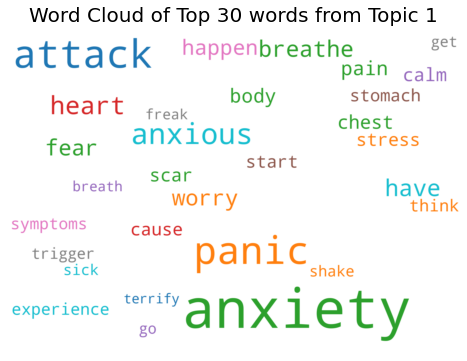

In [196]:
topic_cloud(1)

In [197]:
def topic_df(topic):
    df = df_merge[df_merge['Dominant_Topic']== topic]
    
    return df

In [198]:
df_1 = topic_df(1.0)

In [200]:
df_1['subreddit'].value_counts(normalize = True)

anxiety          0.920006
depression       0.048113
suicidewatch     0.013747
alcoholism       0.007312
schizophrenia    0.005996
bipolarreddit    0.004826
Name: subreddit, dtype: float64

In [331]:
topic_1 = lda_model_final.show_topic(1,topn = 50)
print(topic_1)

[('anxiety', 0.10079826), ('attack', 0.042909767), ('panic', 0.041549016), ('anxious', 0.02153085), ('heart', 0.015712956), ('have', 0.013481167), ('breathe', 0.012786014), ('fear', 0.012141341), ('worry', 0.011989377), ('happen', 0.011082305), ('pain', 0.0095718885), ('body', 0.009135524), ('chest', 0.0087812245), ('calm', 0.008222086), ('scar', 0.008002679), ('stress', 0.007782569), ('cause', 0.007450043), ('start', 0.007253115), ('stomach', 0.006984351), ('think', 0.0065050055), ('experience', 0.0064111874), ('symptoms', 0.006081229), ('trigger', 0.0055922247), ('shake', 0.005428086), ('get', 0.005355378), ('sick', 0.0053119953), ('go', 0.0052858638), ('freak', 0.004813703), ('breath', 0.0047374396), ('terrify', 0.004387023), ('deal', 0.004338118), ('stop', 0.0042564925), ('nervous', 0.0042335773), ('head', 0.0040718243), ('blood', 0.0040470418), ('physical', 0.003891072), ('control', 0.0037650943), ('race', 0.003743077), ('brain', 0.0036473542), ('mind', 0.0035192808), ('constant',

Topic 1 is related to **Anxiety Symptoms**

#### Topic 2 Exploration

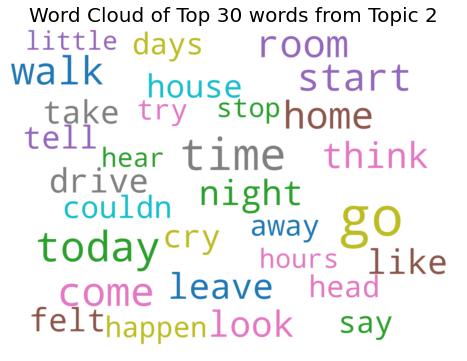

In [202]:
topic_cloud(2)

In [203]:
df_2 = topic_df(2.0)

df_2['subreddit'].value_counts(normalize = True)

depression       0.430834
anxiety          0.313588
suicidewatch     0.170444
schizophrenia    0.043573
alcoholism       0.027124
bipolarreddit    0.014437
Name: subreddit, dtype: float64

In [205]:
topic_2 = lda_model_final.show_topic(2,topn = 50)

In [206]:
print(topic_2)

[('go', 0.02113869), ('time', 0.0133746015), ('today', 0.011712682), ('come', 0.01104619), ('walk', 0.01000712), ('room', 0.009876429), ('start', 0.009768687), ('home', 0.009565637), ('look', 0.008518028), ('think', 0.008349585), ('leave', 0.008236087), ('night', 0.00790639), ('like', 0.007557311), ('drive', 0.0073199254), ('take', 0.006765265), ('house', 0.006662125), ('cry', 0.00664359), ('felt', 0.0066283774), ('tell', 0.0064535523), ('couldn', 0.006108731), ('say', 0.006018484), ('days', 0.005813339), ('head', 0.005777695), ('away', 0.0055030524), ('happen', 0.005296815), ('try', 0.005200763), ('stop', 0.004743566), ('hear', 0.004536889), ('hours', 0.0045225155), ('little', 0.004273095), ('face', 0.0042061955), ('clean', 0.0039446736), ('remember', 0.0039112833), ('know', 0.0038905465), ('minutes', 0.003826998), ('right', 0.003775653), ('jump', 0.0036105723), ('wasn', 0.0035843933), ('call', 0.0035838012), ('eye', 0.0035713834), ('wait', 0.0035297016), ('hand', 0.003520598), ('door

In [217]:
df_2.head()

,subreddit,author,date,post,clean,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
38,depression,DragonDude0994,2018/01/01,First day of 2018 and I want to die Well today...,first day want die well today work around wors...,38,2.0,0.2866,"go, time, today, come, walk, room, start, home...","[want, today, go, work, worst, mood, long, tim..."
42,depression,recycledpaper,2018/01/01,Anybody else like to cook or bake? Want to pic...,anybody else like cook bake want pick recipe w...,42,2.0,0.7275,"go, time, today, come, walk, room, start, home...","[anybody, like, cook, bake, want, pick, recipe..."
48,depression,trovavejko,2018/01/01,Do you avoid mirrors? I'vs noticed that whenev...,avoid mirror ivs notice whenever walk past mir...,48,2.0,0.8096,"go, time, today, come, walk, room, start, home...","[avoid, mirror, notice, walk, past, mirror, lo..."
52,depression,falling_and_laughing,2018/01/01,2018 Resolution : get more consistent about pr...,resolution get consistent praise skillful choi...,52,2.0,0.4555,"go, time, today, come, walk, room, start, home...","[resolution, consistent, praise, skillful, cho..."
53,depression,Typical_Dweller,2018/01/01,How many of y'all ended up crying for no parti...,many yall end cry particular reason last night...,53,2.0,0.5812,"go, time, today, come, walk, room, start, home...","[end, cry, particular, reason, night, bonus, p..."


Topic 2 is more ambiguous in nature but majority of the documents in Topic 2 comes from the Anxiety and Depression subreddit, so it will be related to words that signifies **Depression and Anxiety**

#### Topic 3 Exploration

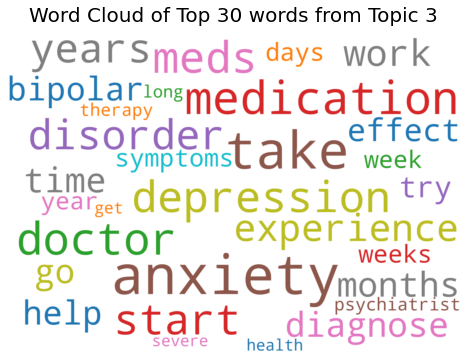

In [218]:
topic_cloud(3)

In [219]:
df_3 = topic_df(3.0)
df_3['subreddit'].value_counts(normalize= True)

depression       0.411644
anxiety          0.343196
bipolarreddit    0.101881
schizophrenia    0.077990
suicidewatch     0.040299
alcoholism       0.024990
Name: subreddit, dtype: float64

In [220]:
topic_3 = lda_model_final.show_topic(3,topn = 50)
print(topic_3)

[('anxiety', 0.022061845), ('take', 0.019928474), ('medication', 0.015280516), ('doctor', 0.014706648), ('meds', 0.0138215525), ('depression', 0.013620862), ('start', 0.013115243), ('disorder', 0.012252414), ('years', 0.011944407), ('experience', 0.011152587), ('work', 0.010528713), ('time', 0.0093493825), ('diagnose', 0.009280254), ('months', 0.009134776), ('go', 0.0089977365), ('help', 0.008575087), ('bipolar', 0.008296509), ('effect', 0.007656105), ('try', 0.006566545), ('symptoms', 0.0065516056), ('days', 0.0065457025), ('weeks', 0.0063604335), ('year', 0.0061882986), ('week', 0.0061615133), ('psychiatrist', 0.005720687), ('therapy', 0.0056485734), ('long', 0.005367236), ('get', 0.0048237625), ('health', 0.0045873127), ('severe', 0.0045482223), ('past', 0.004534685), ('month', 0.0042256713), ('episode', 0.004204536), ('prescribe', 0.0041993274), ('stop', 0.004160121), ('medications', 0.0041242773), ('issue', 0.0041228523), ('mental', 0.003981259), ('schizophrenia', 0.0038022366), (

Topic 3 is related to the **Name of the Mental Conditions**

#### Topic 4 Exploration

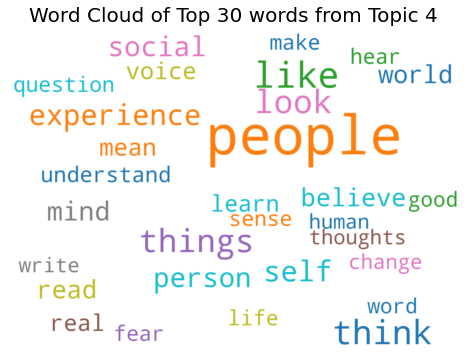

In [221]:
topic_cloud(4)

In [222]:
df_4 = topic_df(4.0)
df_4['subreddit'].value_counts(normalize= True)

depression       0.488702
anxiety          0.249003
schizophrenia    0.114533
suicidewatch     0.111763
bipolarreddit    0.020935
alcoholism       0.015064
Name: subreddit, dtype: float64

In [225]:
topic_4 = lda_model_final.show_topic(4,topn = 50)
print(topic_4)

[('people', 0.033313494), ('like', 0.01040443), ('think', 0.00900804), ('look', 0.00839132), ('things', 0.00824806), ('experience', 0.0065885205), ('self', 0.0065753916), ('social', 0.0060534375), ('person', 0.005895003), ('mind', 0.0055020503), ('read', 0.005021558), ('believe', 0.004960084), ('world', 0.004902929), ('mean', 0.004522254), ('voice', 0.004371725), ('learn', 0.0040727085), ('real', 0.0040655355), ('understand', 0.0036889466), ('hear', 0.003502243), ('make', 0.0034818454), ('sense', 0.0034566973), ('fear', 0.003443814), ('question', 0.003416935), ('life', 0.00332938), ('word', 0.0032810757), ('good', 0.0032555074), ('change', 0.003170142), ('human', 0.0031173308), ('write', 0.003100522), ('thoughts', 0.003074311), ('different', 0.0029432864), ('kind', 0.0028800603), ('speak', 0.00281279), ('brain', 0.0027965475), ('come', 0.0027279116), ('post', 0.0026957777), ('realize', 0.0026747037), ('interest', 0.0026275006), ('create', 0.0025376698), ('share', 0.0025083227), ('schiz

In [232]:
df_4['post'][43]

"My one and only New Years resolution. Isolation. I mean complete isolation. (With the exception of interacting with co-workers at my job and when I have to go grocery shopping of course.) This year my depression was at it's worst. It caused me to drink non-stop and I just got worse and worse. And I just can't be around people. Somewhere along the line I have lost who I am and I hate myself. So I feel before I can face my depression in social situations, I need to learn to be by myself and love myself once again. This may not be the healthiest solution to most people, but for me I feel it's most needed."

Topic 4 is related to the **Words used by Persons with Bipolar and Schizophrenia** 

#### Topic 5 Exploration

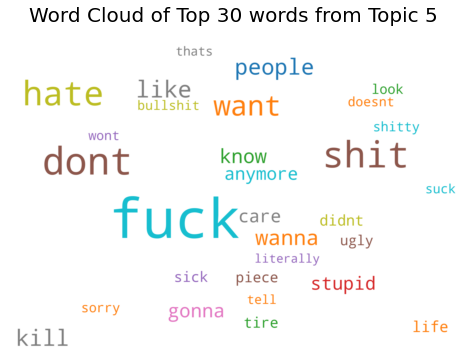

In [233]:
topic_cloud(5)

In [234]:
df_5 = topic_df(5.0)
df_5['subreddit'].value_counts(normalize = True)

depression       0.613511
suicidewatch     0.327573
anxiety          0.038754
schizophrenia    0.011783
alcoholism       0.004451
bipolarreddit    0.003928
Name: subreddit, dtype: float64

In [332]:
topic_5 = lda_model_final.show_topic(5,topn = 50)
print(topic_5)

[('fuck', 0.13110717), ('dont', 0.051797826), ('shit', 0.04710141), ('hate', 0.040441748), ('want', 0.026972257), ('like', 0.01784065), ('kill', 0.01656368), ('people', 0.015917428), ('wanna', 0.014415555), ('know', 0.012383047), ('gonna', 0.011674511), ('stupid', 0.010594795), ('care', 0.010273692), ('anymore', 0.0099761505), ('life', 0.007081933), ('didnt', 0.00689786), ('tire', 0.0065070367), ('sick', 0.0064106216), ('piece', 0.006343533), ('ugly', 0.005801573), ('look', 0.0055153677), ('shitty', 0.005219266), ('sorry', 0.0051545976), ('wont', 0.005075171), ('doesnt', 0.0050724936), ('bullshit', 0.0050034323), ('suck', 0.004924249), ('thats', 0.0048518246), ('tell', 0.0048410613), ('literally', 0.0044472506), ('think', 0.004136467), ('pathetic', 0.0040077767), ('worthless', 0.0039653126), ('right', 0.0037686217), ('probably', 0.0037175752), ('disgust', 0.003630213), ('deserve', 0.0036068712), ('bitch', 0.0035250918), ('useless', 0.003511792), ('hell', 0.003500029), ('hat', 0.0034583

In [334]:
df_5['post'].head(20)

6      “Depression doesn’t exist, I swear. It’s not a...
24     Fuck it I'm day drunk, miserable, and not feel...
91     Stuck with my life I feel down all the time an...
114    no one's gonna touch me. i'm a foreveralone wi...
129    Got into car accident where I was at fault. No...
159    Whats worse than being rejected from your own ...
184    I’m so fucking late for work I’m such a fuckin...
226    FUCKING FIREWORKS FUCKING PEOPLE. I hate human...
271    yet again it seems people don't want to spend ...
278    Honestly I'm laying in bed and thinking about ...
317    I'm going to kill myself. This year has been a...
350    Fuck it! I’m gonna get up from bed, shower, ge...
364    SICK AND TIRED OF EVERYTHING AM TIRED OF BEEN ...
372    I just want to fucking quit. I have severe PTS...
388    I wanna fucking die for new years hahahahah fu...
439    Stop laughing on me Yes I know I'm stupid, yes...
486    It’s funny how just a few comments can make yo...
515    "Hi, are you ok?" "...ye

In [335]:
df_5['post'][317]

"I'm going to kill myself. This year has been a shitty month after shitty month. I broke down in front of 200 people and nobody could get me to calm down for 30 minutes. My last friend moved all the away across the goddamn country and my family thinks I'm a loser and embarrassment. While everyone else is having fun I'm listening to fucking spotify with my pet bird who hates my guts. Why the fuck did God create me? To torture me? Idk anymore I just want to end it. I hate everything and everyone. Fuck this world."

Topic 5 is related to the **Strong Negative Words used by persons with mental health conditions**

#### Topic 6 Exploration

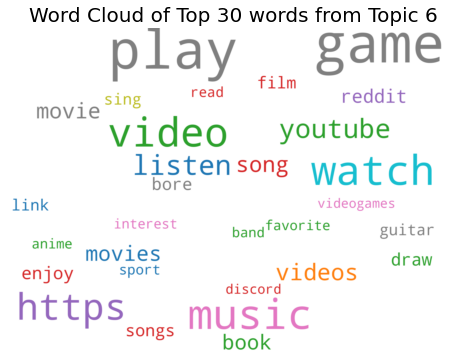

In [236]:
topic_cloud(6)

In [237]:
df_6 = topic_df(6.0)
df_6['subreddit'].value_counts(normalize = True)

depression       0.475701
anxiety          0.306542
suicidewatch     0.104673
schizophrenia    0.070093
bipolarreddit    0.025234
alcoholism       0.017757
Name: subreddit, dtype: float64

In [244]:
df_6['post'].head(20)

555     I can't really describe how, but this scene fr...
822     Depression Poetry and Blogging I've recently s...
1096    Another poem about being alone I have this hab...
1285    No motivation I have no motivation. I don’t kn...
1482    Trying to use humour to get over being on an a...
2145    Music Hi guys. A short bio on me. I was diagno...
2281    Music is the only thing that sometimes helps.\...
2348    Need some advice. Lost all motivation As the t...
2660    If you aren't escaping, then what are you doin...
3340    What games should i play when i'm depressed? I...
3566    I don't understand why I feel so bored about e...
3639    I cant stand this boredom anymore! Its been qu...
3847    Sometimes I feel it I find myself going from t...
4139    What music do you guys listen to cope with thi...
4272    Any Other Sports Fans Here? News Like This is ...
4619    Ugh. I try not to be boring but I guess I am. ...
4631    Losing interest in stuff I love I had the day ...
4654    Trying

In [248]:
df_6['post'][3639]

"I cant stand this boredom anymore! Its been quite a while now, this boredom is literally killing me, I just don't know what to do with myself anymore!! Nothing seem to really catch my attention anymore..\nI have been a gamer and internet addict for so long but now gaming doesnt make it anymore, I have way to much free time and so barely any game can last me more than a few days anymore, not to mention that I cant play all the high end game anymore, even stuff like Divinity 2 its barely run on my laptop.\n\nWith this boredom I feel sleepy almost all the time, I even sometimes go to sleep just to not be so bored anymore, sometime I go to sleep at 8:30pm and wake up at 5 am or so, standing in front of my computer wondering what I should do.\nEither its movies, tv show, youtube video, its not enough, I need more always more!...\n\nI feel so sad. I dont know what to do...\n\nps: for all the genius out there, no, physical exercise IS NOT an option, also suggestion like, read a book and such

Topic 6 is related to **Coping Mechanisms used by persons with mental health conditions**

#### Topic 7 Exploration

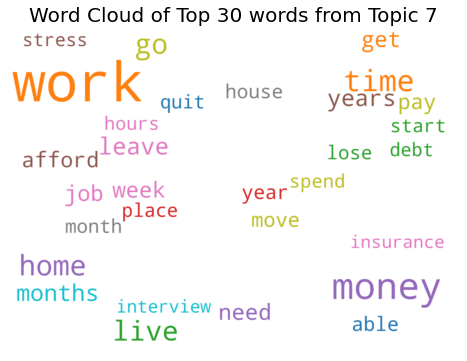

In [249]:
topic_cloud(7)

In [250]:
df_7 = topic_df(7.0)
df_7['subreddit'].value_counts(normalize = True)

depression       0.455058
anxiety          0.342614
suicidewatch     0.150606
bipolarreddit    0.019921
alcoholism       0.016321
schizophrenia    0.015481
Name: subreddit, dtype: float64

In [251]:
df_7['post'].head(20)

11     What do I do? I recently changed out of a job ...
58     . i fear i live in six month stretches/\nrouti...
96     First and last depression post of 2k18 Or at l...
139    How do you force yourself to do work? A.M. suc...
145    My 2018 resolution is save money for a psychia...
156    Should I quit my job? I need some urgent advic...
161    new years day, feeling a lil hopeful, immediat...
165    Is anyone else constantly depressed about mone...
252    My mind went blank and i stole stuff from work...
261    Happy fucking new year's One again spending my...
302    I know everyone is lonely and shit here but id...
303    I've been unemployed for nearly a month. I can...
333    Dear Dominos I get it's NYE, but why has my qu...
394    Depression is back this new years eve.. I grad...
476    Advice for a college student stuck in a rut? A...
500    Is life really worth living? I would really li...
511    God... There's no hope... I have no future.......
561    Back to work after a wee

Topic 7 is related to **Work Related Matters**

#### Topic 8 Exploration

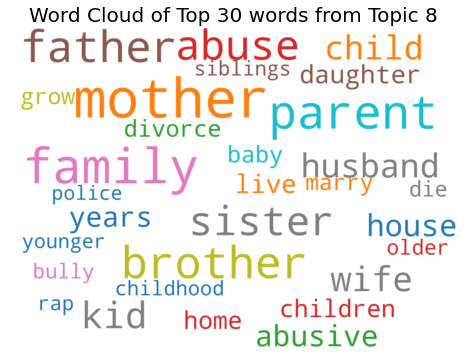

In [252]:
topic_cloud(8)

In [253]:
df_8 = topic_df(8.0)
df_8['subreddit'].value_counts(normalize = True)

depression       0.508115
suicidewatch     0.269663
anxiety          0.111111
alcoholism       0.051186
schizophrenia    0.043695
bipolarreddit    0.016230
Name: subreddit, dtype: float64

Topic 8 is related to **Family matters**

#### Topic 9 Exploration

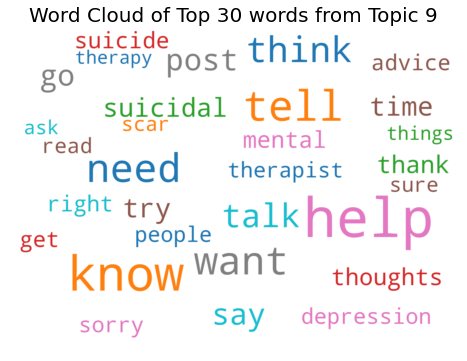

In [254]:
topic_cloud(9)

In [264]:
df_9 = topic_df(9.0)
df_9['subreddit'].value_counts(normalize = True)

depression       0.517669
suicidewatch     0.228224
anxiety          0.187831
schizophrenia    0.029487
alcoholism       0.025181
bipolarreddit    0.011608
Name: subreddit, dtype: float64

In [259]:
df_9['post'].head(20)

0      school makes me suicidal (please help) im a 16...
7      This is what will happen when I kill myself Th...
15     if anyone needs to talk my chat is open. we ar...
18     Has depression affected your job performance? ...
19     I did it! I finally told my parents I was depr...
31     No family, no hopes, no money. Hi, everyone. \...
34     How would you describe anxiety fairly accurate...
41     Unable to make myself ask for help Hey r/depre...
45     does depression make anyone else physically il...
50     Currently doing a project of 85 questions base...
63     I dont know what to do anymore For the past fe...
71     I want to get better, where do I start? Hey ya...
75     I Know I Need Help, But I Don't Know How To St...
78     Ways to help somebody with depression? So my b...
82     starting to feel alone again. In sorry if I do...
99     I feel like my future will be the end of me. 2...
109    I just want someone to tell me I’m not worthle...
122    Permanent Solution The n

Topic 9 is related to **Seeking Advice and Help**

#### Topic 10 Exploration

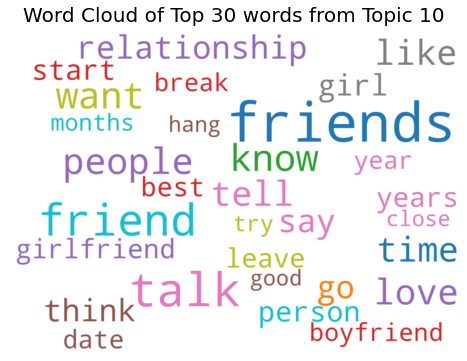

In [260]:
topic_cloud(10)

In [263]:
df_10 = topic_df(10.0)
df_10['subreddit'].value_counts(normalize = True)

depression       0.632661
anxiety          0.180032
suicidewatch     0.156719
alcoholism       0.014034
schizophrenia    0.009967
bipolarreddit    0.006587
Name: subreddit, dtype: float64

Topic 10 is related to **Relationships**

#### Topic 11 Exploration

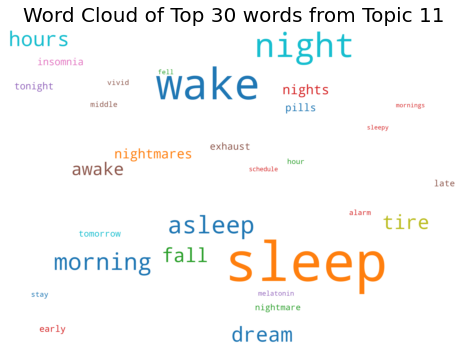

In [262]:
topic_cloud(11)

In [265]:
df_11 = topic_df(11.0)
df_11['subreddit'].value_counts(normalize = True)

depression       0.443709
anxiety          0.350993
suicidewatch     0.116998
bipolarreddit    0.039735
schizophrenia    0.028698
alcoholism       0.019868
Name: subreddit, dtype: float64

Topic 11 is related to **Sleep related issues**

#### Topic 12 Exploration

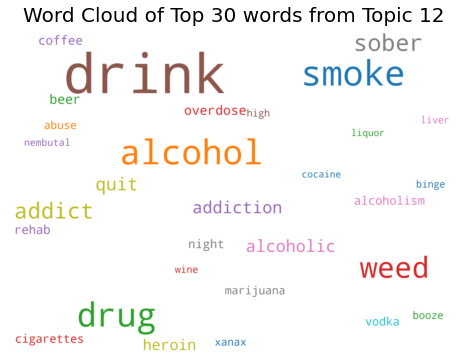

In [266]:
topic_cloud(12)

In [267]:
df_12 = topic_df(12.0)
df_12['subreddit'].value_counts(normalize = True)

alcoholism       0.580931
depression       0.170732
suicidewatch     0.157428
anxiety          0.062084
schizophrenia    0.015521
bipolarreddit    0.013304
Name: subreddit, dtype: float64

Topic 12 is related to **Alcoholism**

#### Topic 13 Exploration

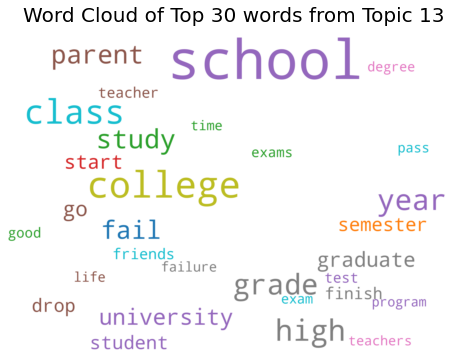

In [281]:
topic_cloud(13)

In [282]:
df_13 = topic_df(13.0)
df_13['subreddit'].value_counts(normalize = True)

depression       0.570785
anxiety          0.261905
suicidewatch     0.154118
schizophrenia    0.005792
bipolarreddit    0.005470
alcoholism       0.001931
Name: subreddit, dtype: float64

Topic 13 is related to **School Matters**

#### Topic 14 Exploration

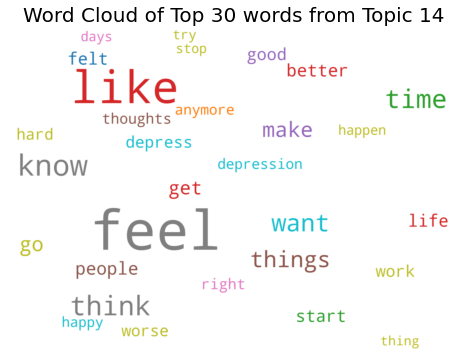

In [283]:
topic_cloud(14)

In [284]:
df_14 = topic_df(14.0)
df_14['subreddit'].value_counts(normalize = True)

depression       0.686901
anxiety          0.178615
suicidewatch     0.103156
alcoholism       0.010688
bipolarreddit    0.010389
schizophrenia    0.010251
Name: subreddit, dtype: float64

In [333]:
topic_14 = lda_model_final.show_topic(14,topn = 50)
print(topic_14)

[('feel', 0.13565722), ('like', 0.088325925), ('know', 0.02623937), ('think', 0.022215264), ('time', 0.02029641), ('want', 0.017657163), ('things', 0.014957262), ('make', 0.012950177), ('go', 0.012106165), ('get', 0.010095725), ('people', 0.008847102), ('better', 0.00848054), ('felt', 0.008135144), ('life', 0.008120571), ('start', 0.008054391), ('good', 0.007933954), ('work', 0.0076739416), ('depress', 0.007275683), ('worse', 0.007091145), ('hard', 0.0066907783), ('right', 0.006048499), ('thoughts', 0.0058581033), ('anymore', 0.0056811944), ('depression', 0.0056517883), ('happy', 0.0053858384), ('days', 0.004998213), ('happen', 0.0049737575), ('try', 0.004874161), ('stop', 0.004750807), ('thing', 0.004663135), ('have', 0.004374193), ('come', 0.004134851), ('actually', 0.0041094082), ('lose', 0.0040890565), ('normal', 0.004047267), ('need', 0.0040193517), ('hate', 0.003981833), ('constantly', 0.0039657443), ('point', 0.0038794784), ('past', 0.0038449394), ('tire', 0.0037321786), ('help'

Topic 14 is dealing with **Feelings**

## Exploration of Subreddits

Topic Summary:

Topic 0: Suicide Ideation

Topic 1: Anxiety

Topic 2: Common Words used by persons with Mental Health Conditions

Topic 3: Name of Mental Health Conditions

Topic 4: Words used by persons with Bipolar and Schizophrenia

Topic 5: Strong Negative Words

Topic 6: Coping Mechanisms

Topic 7: Employment 

Topic 8: Family 

Topic 9: Seeking Advice and Help

Topic 10: Relationships

Topic 11: Sleep

Topic 12: Alcoholism

Topic 13: Academics

Topic 14: Feelings

In [286]:
df_merge.head()

,subreddit,author,date,post,clean,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,depression,hanngapoi,2018/01/01,school makes me suicidal (please help) im a 16...,school make suicidal please help year old girl...,0,9.0,0.6241,"help, know, tell, need, want, think, talk, pos...","[school, make, suicidal, help, year, girl, eng..."
1,depression,thr0w4w4y989897,2018/01/01,I give up. Failed I just want to wipe my hands...,give fail want wipe hand clean bare minimum re...,1,0.0,0.5127,"life, want, live, know, think, kill, anymore, ...","[fail, want, wipe, hand, clean, bare, minimum,..."
2,depression,mooseman1800,2018/01/01,"depressed over the holidays No calls, messages...",depress holiday call message email holiday lif...,2,10.0,0.6203,"friends, talk, friend, want, know, people, lov...","[depress, holiday, call, message, email, holid..."
3,depression,throwaway1802360,2018/01/01,It’s hard I don’t want to go back to school th...,hard dont want back school week hard alone sch...,3,10.0,0.4170,"friends, talk, friend, want, know, people, lov...","[hard, want, school, week, hard, school, hard,..."
4,depression,atemylife,2018/01/01,Year in Pixels I'm going to be doing one of th...,year pixels one year pixels things track much ...,4,13.0,0.3861,"school, college, class, high, year, grade, stu...","[year, pixels, go, year, pixels, things, track..."


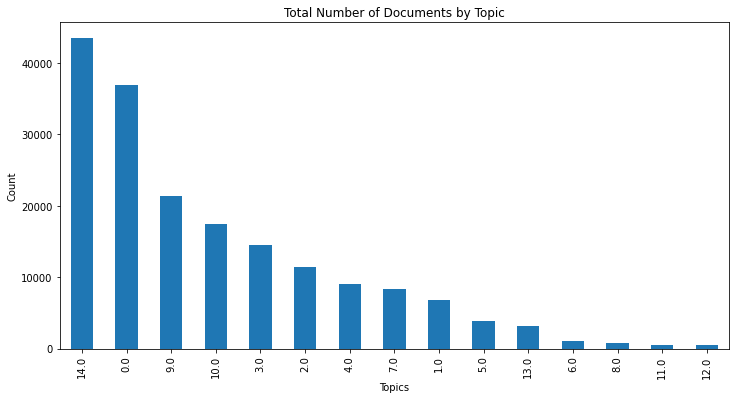

In [311]:
plt.figure(figsize = (12,6))
df_merge['Dominant_Topic'].value_counts().plot.bar()
plt.title('Total Number of Documents by Topic')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.show()

In [321]:
# Plot Topic count
def plot_topic_count(subreddit):
    plt.figure(figsize = (12,6))
    df_merge[df_merge['subreddit'] == subreddit]['Dominant_Topic'].value_counts().plot.bar()
    plt.title(f'Total Number of Documents by Topic in r/{subreddit}')
    plt.xlabel('Topics')
    plt.ylabel('Count')
    plt.show()

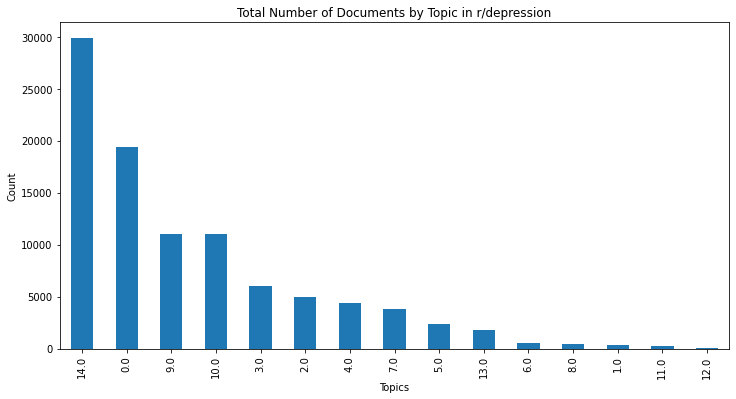

In [322]:
plot_topic_count('depression')

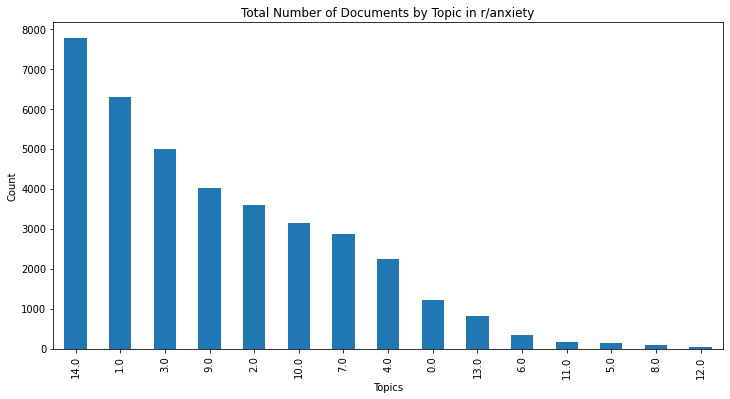

In [323]:
plot_topic_count('anxiety')

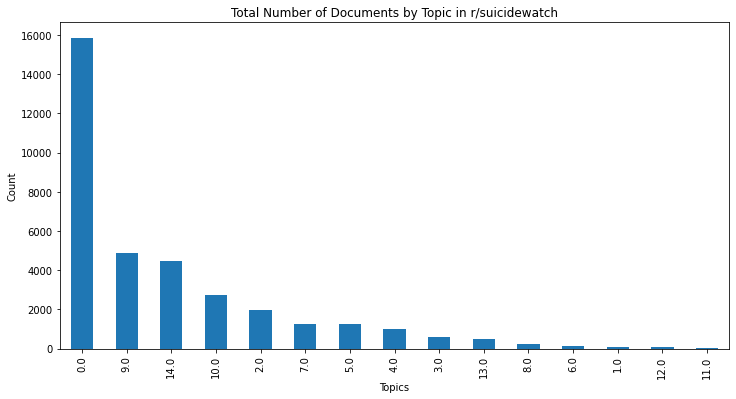

In [324]:
plot_topic_count('suicidewatch')

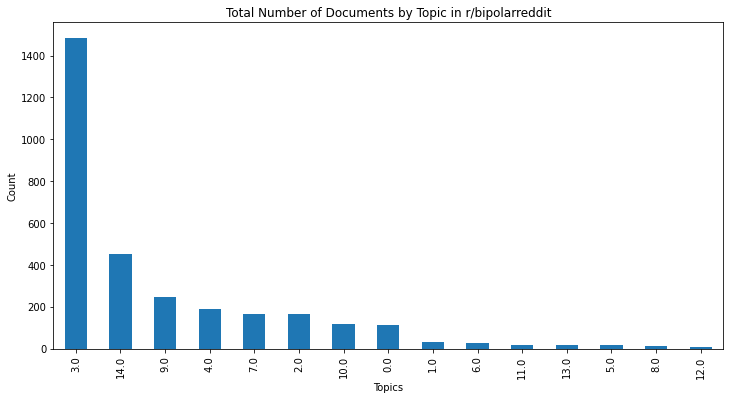

In [325]:
plot_topic_count('bipolarreddit')

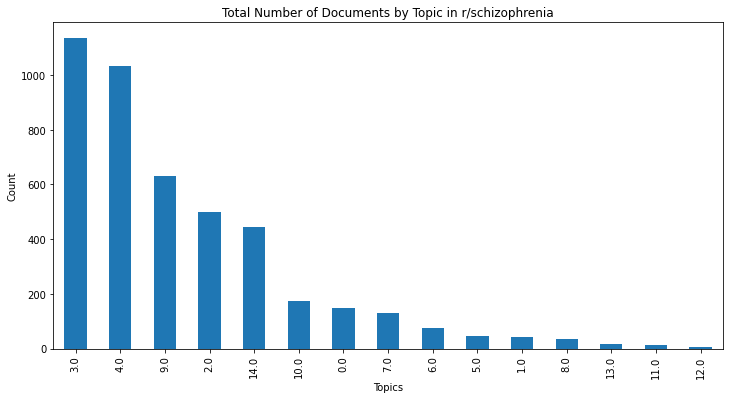

In [326]:
plot_topic_count('schizophrenia')

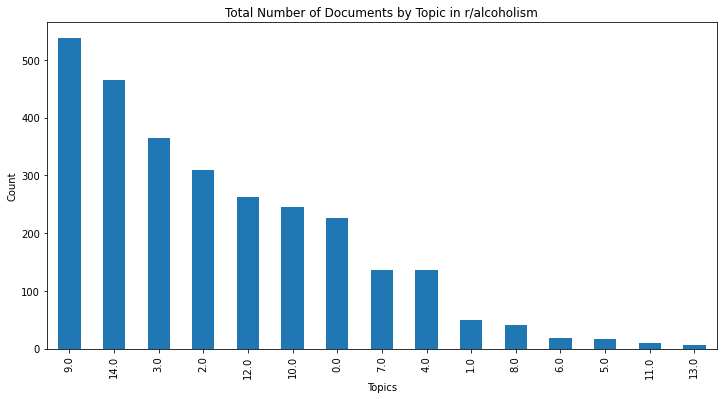

In [327]:
plot_topic_count('alcoholism')

## Preparing Suicidal Posts 

Looking at the Topics, I would classify Topic 5 and Topic 0 to be suicidal posts

In [384]:
#Creating Variable

df_merge['is_suicide'] = [1 if x == 0.0 or x == 5.0 or x == 9.0 else 0 for x in df_merge['Dominant_Topic']]

In [385]:
df_merge['is_suicide'].value_counts(normalize = True)

0    0.653304
1    0.346696
Name: is_suicide, dtype: float64

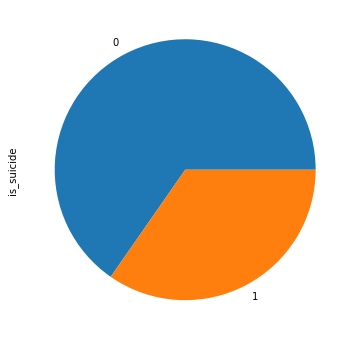

In [388]:
plt.figure(figsize = (12,6))
df_merge['is_suicide'].value_counts(normalize = True).plot.pie()
plt.show()

In [387]:
df_merge.to_csv('model.csv', index = False)